In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score

In [58]:
data = pd.read_csv('../Somativa_IA/dadosacoes.csv',)
data

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975
...,...,...,...,...
95,SUZB3,208,78,3035
96,VALE3,253,60,3263
97,GOOGLE,99,35,980
98,VALE3,82,43,1866


In [59]:
# cores = {
#     'AAPL': 'blue',
#     'GOOGLE': 'green',
#     'MSFT': 'red',
#     'AMZN': 'purple',
#     'TSLA': 'orange',
#     'FB': 'cyan'
# }
# sns.boxplot(x=data['nome ação'],y=data['preço ação R$'], palette=cores)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [61]:
data.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [62]:
# Verificar valores ausentes
print(data.isnull().sum())

# Codificar variáveis categóricas usando pd.get_dummies
data_encoded = pd.get_dummies(data, columns=['nome ação'], drop_first=True)

# Visualizar os dados após a codificação
print(data_encoded.head())


nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64
   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  nome ação_APPLE  \
0            194          45                            2134            False   
1             91          71                            3069            False   
2            165          41                            2815            False   
3             56          34                            3613            False   
4            212           9                            2975            False   

   nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  nome ação_SUZB3  \
0              False             False            False            False   
1              False             False            False             True   
2              False             False            False             True   
3              False             False            Fa

In [63]:
from sklearn.preprocessing import StandardScaler

# Selecionar as características para o agrupamento
features = ['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']

# Padronizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded[features])

# K-Means com n_clusters = 4
kmeans_4 = KMeans(n_clusters=4, random_state=0)
data_encoded['Cluster_4'] = kmeans_4.fit_predict(data_scaled)

# Visualizar os clusters
print(data_encoded[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)', 'Cluster_4']].head())


   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  Cluster_4
0            194          45                            2134          1
1             91          71                            3069          0
2            165          41                            2815          2
3             56          34                            3613          3
4            212           9                            2975          2


In [64]:
kmeans_5 = KMeans(n_clusters=5, random_state=0)
data_encoded['Cluster_5'] = kmeans_5.fit_predict(data_scaled)


In [65]:
kmeans_8 = KMeans(n_clusters=8, random_state=0)
data_encoded['Cluster_8'] = kmeans_8.fit_predict(data_scaled)


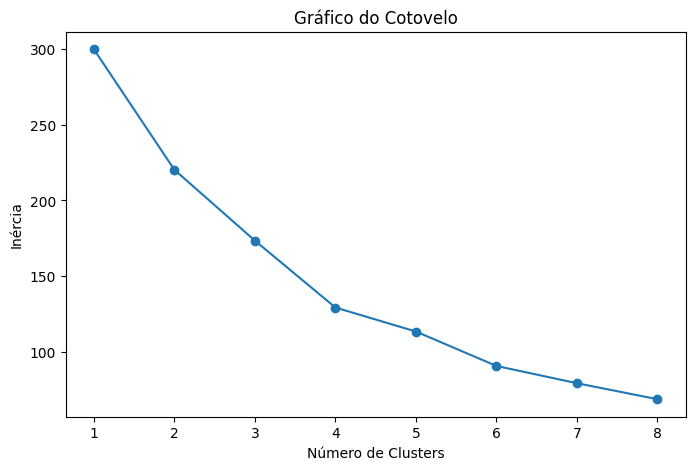

In [66]:
# Gráfico do Cotovelo
inertia = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 9), inertia, marker='o')
plt.title('Gráfico do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


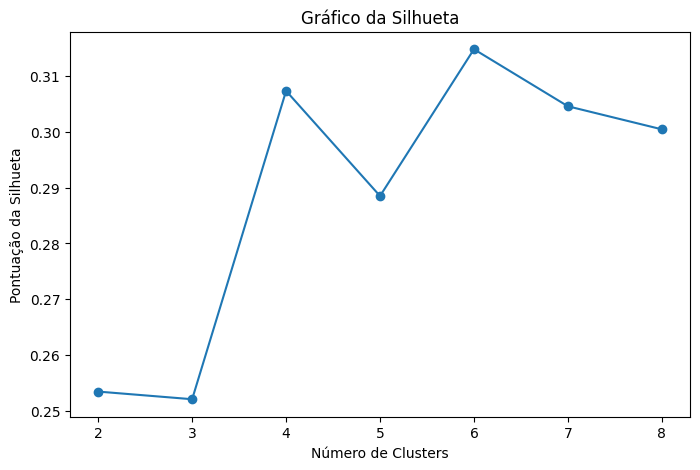

In [67]:
from sklearn.metrics import silhouette_score

# Calcular a pontuação de silhueta para diferentes valores de clusters
silhouette_scores = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Plotar o gráfico da silhueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.title('Gráfico da Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.show()


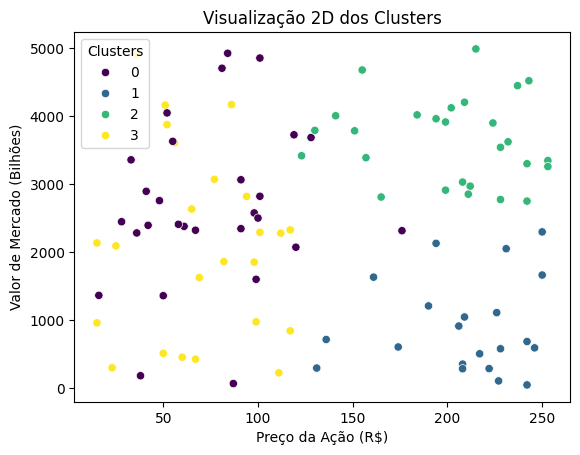

In [68]:
sns.scatterplot(
    x=data_encoded['preço ação R$'],
    y=data_encoded['valor de mercado R$ -(Bilhões)'],
    hue=data_encoded['Cluster_4'],
    palette='viridis'
)
plt.title('Visualização 2D dos Clusters')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.legend(title='Clusters')
plt.show()


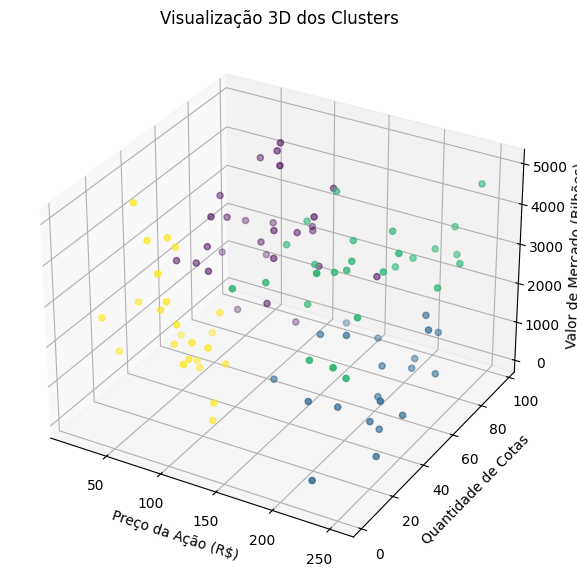

In [69]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Adicionar dados
ax.scatter(
    data_encoded['preço ação R$'],
    data_encoded['qtde cotas'],
    data_encoded['valor de mercado R$ -(Bilhões)'],
    c=data_encoded['Cluster_4'],
    cmap='viridis'
)

# Títulos e eixos
ax.set_title('Visualização 3D dos Clusters')
ax.set_xlabel('Preço da Ação (R$)')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (Bilhões)')
plt.show()


Valor médio para 4 clusters: 0.208


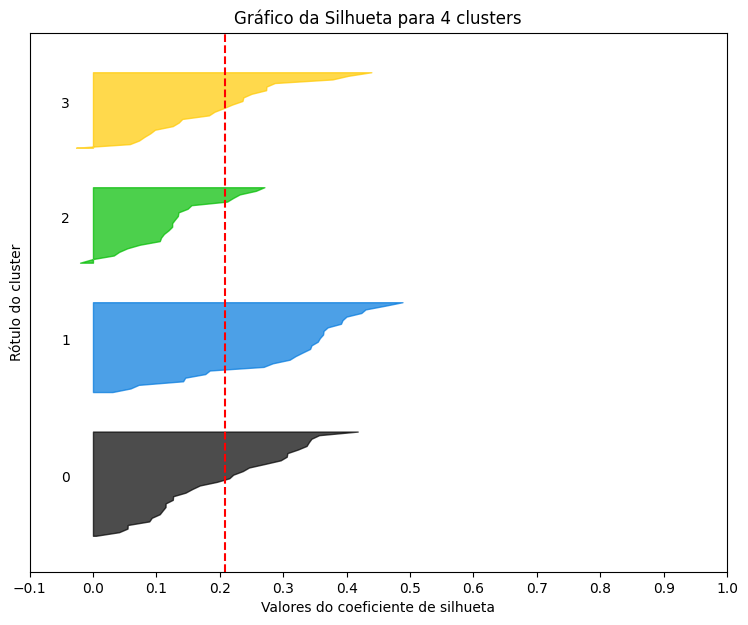

In [70]:
def graf_silhueta(n_clusters, data):
    # Pré-processamento
    le = LabelEncoder()
    data['nome ação'] = le.fit_transform(data['nome ação'])  # Codificar 'nome ação'
    
    # Selecionar as colunas numéricas para clustering
    dados_n = data[['nome ação', 'preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
    scaler = StandardScaler()
    dados_n = scaler.fit_transform(dados_n)
    
    # Aplicar o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init='auto')
    cluster_previsoes = kmeans.fit_predict(dados_n)
    
    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados_n, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')
    
    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados_n, cluster_previsoes)
    
    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados_n) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()
        
        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i
        
        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra, 
                          facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos
        
    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')
        
    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    
    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i / 10.0 for i in range(-1, 11)])
    
    plt.show()

# Exemplo de uso da função
graf_silhueta(4, data)

In [ ]:
# Qual a maior vantagem do aprendizado não supervisionado diante o 
# aprendizado supervisionado?
"""
A maior vantagem do aprendizado não supervisionado é a capacidade de 
identificar padrões em dados sem a necessidade de rótulos, economizando 
tempo e custos com rotulagem. Ele é ideal para explorar dados não 
estruturados, descobrir agrupamentos, reduzir dimensionalidade e 
gerar insights iniciais em cenários onde os rótulos não estão 
disponíveis.
"""

'\nA maior vantagem do aprendizado não supervisionado é a capacidade de \nidentificar padrões em dados sem a necessidade de rótulos, economizando \ntempo e custos com rotulagem. Ele é ideal para explorar dados não \nestruturados, descobrir agrupamentos, reduzir dimensionalidade e \ngerar insights iniciais em cenários onde os rótulos não estão \ndisponíveis.\n'